In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file with specified headers
tree_file_path = "order_processing_times.csv"
heap_file_path = "../1_BaseSetup/order_processing_times.csv"
data_heap = pd.read_csv(heap_file_path, names=["Type", "Latency(ns)"])
data_tree = pd.read_csv(tree_file_path, names=['Type', 'Latency(ns)', 'Executed Orders', 'AVL Tree Balances'])

In [5]:
# Filter AVL tree data make it comparable to heap data
data_tree = data_tree[data_tree['Type'] == 'AddLimit']

# Filter out data where Latency(ns) > 4000
filtered_data_tree = data_tree[data_tree["Latency(ns)"] <= 4000]

subset1 = filtered_data_tree.iloc[20000:30000]
subset2 = filtered_data_tree.iloc[-10000:]

combined_data_tree = pd.concat([subset1, subset2]).reset_index(drop=True)

In [6]:
# Filter out data where Latency(ns) > 4000
filtered_data_heap = data_heap[data_heap["Latency(ns)"] <= 4000]

subset1 = filtered_data_heap.iloc[20000:30000]
subset2 = filtered_data_heap.iloc[-10000:]

combined_data_heap = pd.concat([subset1, subset2]).reset_index(drop=True)

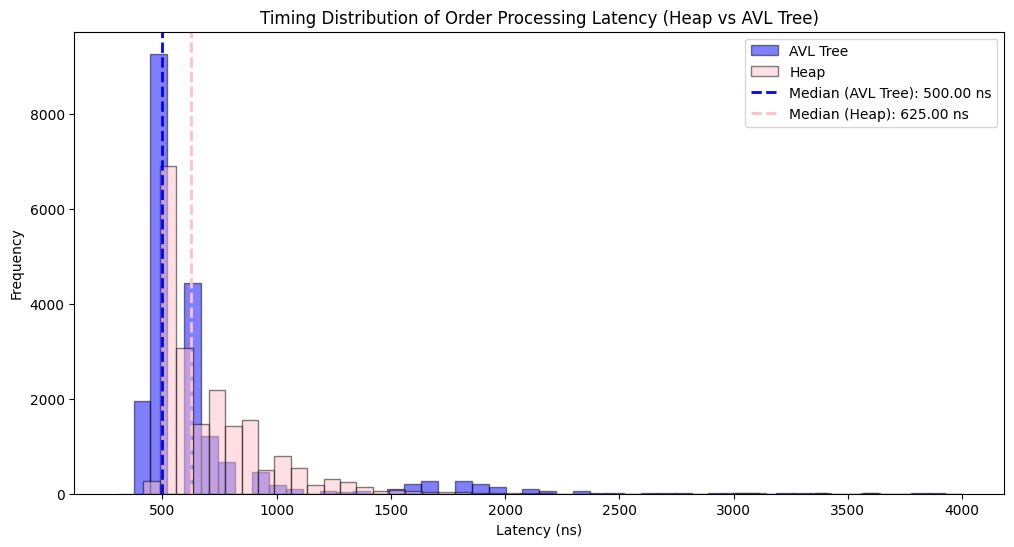

In [12]:
# Calculate the median latency for both datasets
median_tree = combined_data_tree["Latency(ns)"].median()
median_heap = combined_data_heap["Latency(ns)"].median()

# Plot the histogram for timing distribution
plt.figure(figsize=(12, 6))
plt.hist(combined_data_tree["Latency(ns)"], bins=50, color='blue', alpha=0.5, edgecolor='black', label='AVL Tree')
plt.hist(combined_data_heap["Latency(ns)"], bins=50, color='pink', alpha=0.5, edgecolor='black', label='Heap')

# Add vertical lines for the medians
plt.axvline(median_tree, color='blue', linestyle='--', linewidth=2, label=f"Median (AVL Tree): {median_tree:.2f} ns")
plt.axvline(median_heap, color='pink', linestyle='--', linewidth=2, label=f"Median (Heap): {median_heap:.2f} ns")

# Add labels and title
plt.xlabel("Latency (ns)")
plt.ylabel("Frequency")
plt.title(f"Timing Distribution of Order Processing Latency (Heap vs AVL Tree)")

# Add legend
plt.legend()

# Show the plot
plt.show()